In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import xgboost
from xgboost import XGBClassifier

In [ ]:
def var_stats(source):

  # read the source to a dataframe
  source = pd.read_csv(source)

  # stats of source
  d = source.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T
  d['miss'] = source.isnull().sum()
  d['missrate'] = d['miss']/len(source)

  # export an csv
  d.to_csv('source_sum.csv')

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
def imp_rank(source, dataset, varinfo):

  # read the source to a dataframe
  source = pd.read_csv(source)

  X_train = pd.read_csv(dataset)
  y_train = X_train['y']
  X_train = X_train.drop(['Unnamed: 0', 'y'], axis=1)

  # merge source and dataset together
  data = source.merge(X_train, left_on = ['pol_id',	'year'], right_on = ['pol_id','year'], how='inner')

  # drop index, categorical
  var = data.drop(['pol_id','year','STATE','ZIP5','ZIP4'], axis=1)

  # impute NA with mean
  var = var.apply(lambda x: x.fillna(x.mean())) 

  # RandomForest Check
  modelRF = RandomForestClassifier()
  modelRF.fit(var, y_train)
  impRF = modelRF.feature_importances_
  plot_feature_importance(impRF,var.columns,'RANDOM FOREST')

  # XGBoost Check
  modelXG = XGBClassifier()
  modelXG.fit(var, y_train)
  impXG = modelXG.feature_importances_
  plot_feature_importance(impXG,var.columns,'XGBOOST')

  # DecisionTree Check
  modelDT = DecisionTreeClassifier()
  modelDT.fit(var, y_train)
  impDT = modelDT.feature_importances_
  plot_feature_importance(impDT,var.columns,'DECISION TREES')

  # Lasso coefficient
  modelLS = LogisticRegression(penalty='l1', solver='liblinear')
  modelLS.fit(var, y_train)
  impLS = modelLS.coef_
  plot_feature_importance(impLS[0],var.columns,'LASSO REGRESSION')

  # append the information to varinfo
  s = pd.read_csv(varinfo)
  s = s.drop([0])
  s['RF_imp'] = impRF
  s['XGB_imp'] = impXG
  s['DT_imp'] = impDT
  s['Lasso_coe'] = impLS[0]
  s['LS_imp'] = (s['Lasso_coe'].abs())/(s['Lasso_coe'].abs().sum())

  

  s.to_csv('importance.csv')



In [ ]:
var_stats('/content/drive/MyDrive/BU Capstone Team2 Credit No_hit/Results 4.16/top_imp (1).csv')

In [ ]:
sum = pd.read_csv('/content/source_sum.csv')

In [ ]:
sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  131 non-null    object 
 1   count       131 non-null    float64
 2   mean        131 non-null    float64
 3   std         131 non-null    float64
 4   min         131 non-null    float64
 5   1%          131 non-null    float64
 6   5%          131 non-null    float64
 7   10%         131 non-null    float64
 8   25%         131 non-null    float64
 9   50%         131 non-null    float64
 10  75%         131 non-null    float64
 11  90%         131 non-null    float64
 12  95%         131 non-null    float64
 13  99%         131 non-null    float64
 14  max         131 non-null    float64
 15  miss        131 non-null    int64  
 16  missrate    131 non-null    float64
dtypes: float64(15), int64(1), object(1)
memory usage: 17.5+ KB


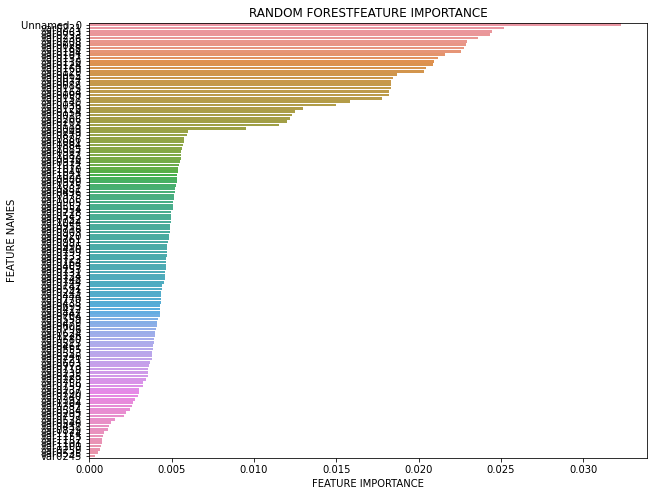

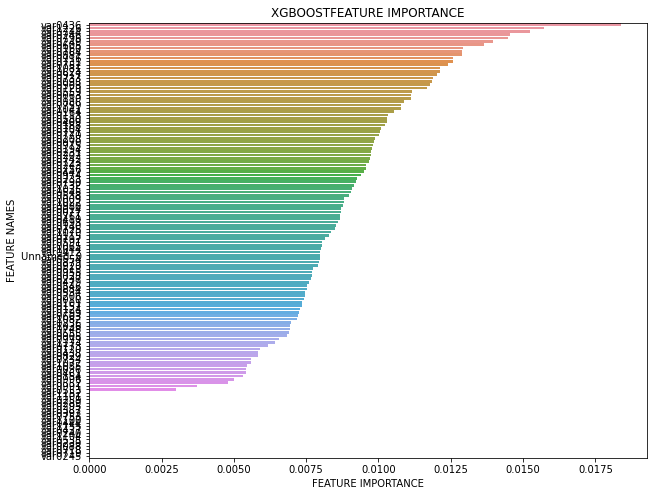

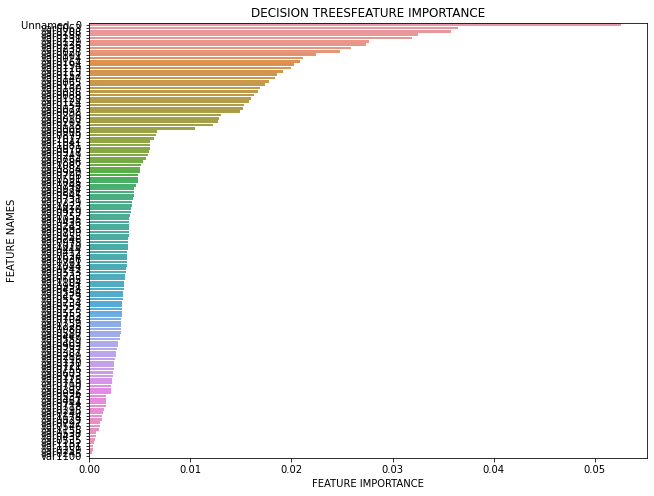

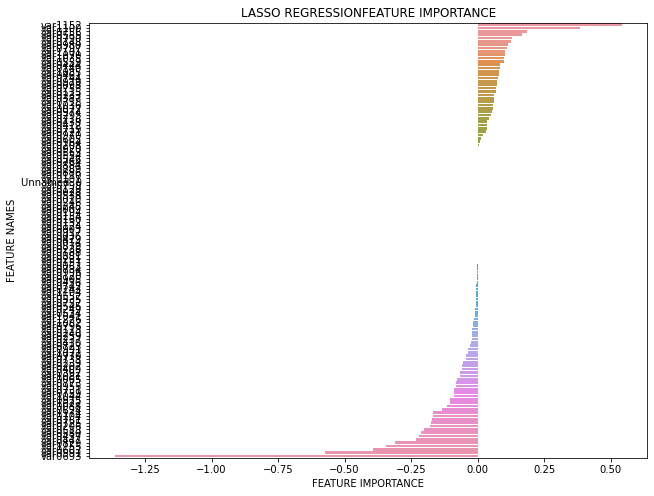

In [ ]:
imp_rank('/content/drive/MyDrive/BU Capstone Team2 Credit No_hit/Results 4.16/top_imp (1).csv','/content/drive/MyDrive/BU Capstone/sample design results/id_Xtrain.csv','/content/source_sum.csv')

# test the models

In [ ]:
source1 = pd.read_csv('/content/drive/MyDrive/BU Capstone Team2 Credit No_hit/Data/team2_source1.csv.gz')
X_train = pd.read_csv('/content/drive/MyDrive/BU Capstone/sample design results/id_Xtrain.csv')
y_train = X_train['y']
X_train = X_train.drop(['Unnamed: 0', 'y'], axis=1)
data1 = source1.merge(X_train, left_on = ['pol_id',	'year'], right_on = ['pol_id',	'year'], how='inner')
var = data1.drop(['pol_id','year','STATE','ZIP5','ZIP4'], axis=1)
var = var.apply(lambda x: x.fillna(x.mean()))

In [ ]:
var.head()

,var0009,var0010,var0011,var0012,var0013,var0014,var0015,var0016,var0017,var0018,var0019,var0020,var0021,var0022,var0023,var0024,var0025,var0026,var0027,var0028,var0029,var0030,var0031,var0032,var0033,var0034,var0035,var0036,var0037,var0038,var0039,var0040,var0041,var0042,var0043,var0044,var0045,var0046,var0047,var0048,...,var0674,var0675,var0676,var0677,var0678,var0679,var0680,var0681,var0682,var0683,var0684,var0685,var0686,var0687,var0688,var0689,var0690,var0691,var0692,var0693,var0694,var0695,var0696,var0697,var0698,var0699,var0700,var0701,var0702,var0703,var0704,var0705,var0706,var0707,var0708,var0709,var0710,var0711,var0712,var0713
0,1.399841e+13,1.499801e+13,9.791195,1.209152,1.120664,2003.490935,1.18838,1.18838,1.137626,1.303093,1.120712,1.171493,1.11339,1.113229,1.187059,1.333847,1.166396,1.254416,1.469477,7.052089e+08,1.308289,1.380113,1.239821,1.234891,0.758692,1.150927,1.236667,2008.535368,1.358371,1.269877,1.413714,1.185291,1.397046,1.703264,1.32014,1.465152,1.183661,1.342761,20582.754146,1.293308,...,0.131043,0.000998,0.011835,124.551965,0.555019,0.002152,0.059826,158.204967,459.249136,0.008605,1.001173,0.444981,0.011213,0.001567,0.013877,0.001957,1557.670578,227046.200493,0.000182,0.124643,0.011900,0.019017,0.002127,1.013721,978.867361,0.002466,0.855462,0.003129,1.688395,1.002949,0.639722,0.066298,0.000923,0.002769,0.001537,0.001797,0.000837,0.980491,0.417033,0.120684
1,1.399841e+13,1.499801e+13,9.791195,1.209152,1.120664,2003.490935,1.18838,1.18838,1.137626,1.303093,1.120712,1.171493,1.11339,1.113229,1.187059,1.333847,1.166396,1.254416,1.469477,7.052089e+08,1.308289,1.380113,1.239821,1.234891,0.758692,1.150927,1.236667,2008.535368,1.358371,1.269877,1.413714,1.185291,1.397046,1.703264,1.32014,1.465152,1.183661,1.342761,20582.754146,1.293308,...,0.131043,0.000998,0.011835,124.551965,0.555019,0.002152,0.059826,158.204967,459.249136,0.008605,1.001173,0.444981,0.011213,0.001567,0.013877,0.001957,1557.670578,227046.200493,0.000182,0.124643,0.011900,0.019017,0.002127,1.013721,978.867361,0.002466,0.855462,0.003129,1.688395,1.002949,0.639722,0.066298,0.000923,0.002769,0.001537,0.001797,0.000837,0.980491,0.417033,0.120684
2,1.399841e+13,1.499801e+13,9.791195,1.209152,1.120664,2003.490935,1.18838,1.18838,1.137626,1.303093,1.120712,1.171493,1.11339,1.113229,1.187059,1.333847,1.166396,1.254416,1.469477,7.052089e+08,1.308289,1.380113,1.239821,1.234891,0.758692,1.150927,1.236667,2008.535368,1.358371,1.269877,1.413714,1.185291,1.397046,1.703264,1.32014,1.465152,1.183661,1.342761,20582.754146,1.293308,...,0.113229,0.000826,0.010926,133.000000,0.847528,0.002384,0.061686,117.000000,639.000000,0.009565,0.998588,0.152472,0.012989,0.001766,0.012642,0.002215,2233.000000,294382.900000,0.000200,0.107063,0.012982,0.020030,0.002398,0.973281,696.000000,0.002609,1.497457,0.003190,0.882126,1.070772,0.654912,0.072893,0.001012,0.003171,0.001798,0.001981,0.000691,0.915383,0.739114,0.125691
3,1.399841e+13,1.499801e+13,9.791195,1.209152,1.120664,2003.490935,1.18838,1.18838,1.137626,1.303093,1.120712,1.171493,1.11339,1.113229,1.187059,1.333847,1.166396,1.254416,1.469477,7.052089e+08,1.308289,1.380113,1.239821,1.234891,0.758692,1.150927,1.236667,2008.535368,1.358371,1.269877,1.413714,1.185291,1.397046,1.703264,1.32014,1.465152,1.183661,1.342761,20582.754146,1.293308,...,0.131043,0.000998,0.011835,124.551965,0.555019,0.002152,0.059826,158.204967,459.249136,0.008605,1.001173,0.444981,0.011213,0.001567,0.013877,0.001957,1557.670578,227046.200493,0.000182,0.124643,0.011900,0.019017,0.002127,1.013721,978.867361,0.002466,0.855462,0.003129,1.688395,1.002949,0.639722,0.066298,0.000923,0.002769,0.001537,0.001797,0.000837,0.980491,0.417033,0.120684
4,1.399841e+13,1.499801e+13,9.791195,1.209152,1.120664,2003.490935,1.18838,1.18838,1.137626,1.303093,1.120712,1.171493,1.11339,1.113229,1.187059,1.333847,1.166396,1.254416,1.469477,7.052089e+08,1.308289,1.380113,1.239821,1.234891,0.758692,1.150927,1.236667,2008.535368,1.358371,1.269877,1.413714,1.185291,1.397046,1

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/BU Capstone/sample design results/id_Xtest.csv')
y_test = X_test['y']
X_test = X_test.drop(['Unnamed: 0', 'y'], axis=1)
data1_t = source1.merge(X_test, left_on = ['pol_id',	'year'], right_on = ['pol_id',	'year'], how='inner')
var_t = data1_t.drop(['pol_id','year','STATE','ZIP5','ZIP4'], axis=1)
var_t = var_t.apply(lambda x: x.fillna(x.mean()))

In [ ]:
var_t.head()

,var0009,var0010,var0011,var0012,var0013,var0014,var0015,var0016,var0017,var0018,var0019,var0020,var0021,var0022,var0023,var0024,var0025,var0026,var0027,var0028,var0029,var0030,var0031,var0032,var0033,var0034,var0035,var0036,var0037,var0038,var0039,var0040,var0041,var0042,var0043,var0044,var0045,var0046,var0047,var0048,...,var0674,var0675,var0676,var0677,var0678,var0679,var0680,var0681,var0682,var0683,var0684,var0685,var0686,var0687,var0688,var0689,var0690,var0691,var0692,var0693,var0694,var0695,var0696,var0697,var0698,var0699,var0700,var0701,var0702,var0703,var0704,var0705,var0706,var0707,var0708,var0709,var0710,var0711,var0712,var0713
0,1.399841e+13,1.499801e+13,9.76744,1.200569,1.117144,2003.549814,1.187388,1.187388,1.136092,1.296625,1.119994,1.168788,1.117704,1.117426,1.190633,1.328142,1.168379,1.254554,1.470632,7.060666e+08,1.307003,1.365497,1.236229,1.239417,0.75792,1.150968,1.233878,2008.528751,1.356463,1.257141,1.402099,1.191044,1.396787,1.701521,1.322137,1.475054,1.185218,1.34227,20489.944953,1.290895,...,0.130851,0.000996,0.011830,124.51495,0.556715,0.002153,0.059859,158.015057,461.387418,0.008613,1.001085,0.443285,0.011372,0.001569,0.013855,0.001960,1565.171311,227831.048253,0.000182,0.124457,0.011911,0.019043,0.002130,1.013645,976.919462,0.002470,0.859790,0.003133,1.672163,1.007521,0.639907,0.066361,0.000924,0.002773,0.001540,0.001798,0.000836,0.980173,0.419680,0.120729
1,1.399811e+13,1.499711e+13,1.00000,1.705242,0.107922,2017.000000,1.587818,1.587818,1.395953,2.749485,1.364484,1.644403,1.363018,1.362723,1.720283,2.729550,1.511873,1.841712,3.397868,6.690556e+08,2.510912,3.843710,1.932843,1.988540,1.00000,1.541658,2.032334,1997.000000,4.063402,2.249246,4.182270,1.880891,1.480976,0.000000,3.051090,3.493346,2.382803,3.36950,38500.000000,2.586312,...,0.133204,0.000929,0.011839,118.00000,0.366449,0.002121,0.060008,186.000000,679.000000,0.008531,1.021384,0.633551,0.000000,0.001526,0.015044,0.001938,2013.000000,249733.200000,0.000182,0.126179,0.011722,0.018817,0.002066,1.000000,1088.000000,0.002286,0.159072,0.002992,1.700747,1.193600,0.634631,0.065118,0.000893,0.002731,0.001498,0.001762,0.000764,1.000000,0.165039,0.118802
2,1.399811e+13,1.499711e+13,15.00000,1.705242,1.618828,1993.000000,1.587818,1.587818,1.395953,2.749485,1.364484,1.644403,1.363018,1.362723,1.720283,2.729550,1.511873,1.841712,3.397868,6.690918e+08,2.510912,3.843710,1.932843,1.988540,1.00000,1.541658,0.000000,2002.000000,0.000000,2.249246,0.000000,1.128534,1.480976,4.005756,0.000000,3.493346,1.429682,3.36950,25000.000000,0.000000,...,0.133204,0.000929,0.011839,118.00000,0.366449,0.002121,0.060008,186.000000,679.000000,0.008531,1.021384,0.633551,0.000000,0.001526,0.015044,0.001938,2013.000000,249733.200000,0.000182,0.126179,0.011722,0.018817,0.002066,1.000000,1088.000000,0.002286,0.159072,0.002992,1.700747,1.193600,0.634631,0.065118,0.000893,0.002731,0.001498,0.001762,0.000764,1.000000,0.165039,0.118802
3,1.399811e+13,1.499711e+13,15.00000,1.705242,1.618828,1991.000000,1.587818,1.587818,1.395953,2.749485,1.364484,1.644403,1.363018,1.362723,1.720283,2.729550,1.511873,1.841712,3.397868,6.690674e+08,2.510912,3.843710,1.932843,1.988540,1.00000,1.541658,2.032334,2006.000000,4.063402,2.249246,4.182270,1.880891,1.480976,4.005756,3.051090,3.493346,2.382803,3.36950,25000.000000,2.586312,...,0.148859,0.001206,0.012569,118.00000,0.361751,0.002002,0.056953,187.000000,706.000000,0.007752,1.021811,0.638249,0.000189,0.001395,0.015477,0.001668,2084.000000,232775.500000,0.000164,0.142402,0.011182,0.017093,0.001893,1.000000,1091.000000,0.002301,0.289935,0.003098,1.680834,1.132438,0.639700,0.060879,0.000879,0.002313,0.001320,0.001592,0.001015,1.000000,0.171358,0.117131
4,1.399811e+13,1.499711e+13,14.00000,1.705242,1.510906,2004.000000,1.587818,1.587818,1.395953,2.749485,1.364484,1.644403,1.363018,1.362723,1.720283,2.729550,1.511873,1.841712,0.000000,5.058879e+08,2.510912,3.843710,1.932843,1.988540,1.00000,1.541658,2.032334,2008.528751,4.063402,2.249246,4.182270,0.752356,1.4

In [ ]:
# random forest
modelRF = RandomForestClassifier()
modelRF.fit(var, y_train)
RF_pred = modelRF.predict(var_t)
print(accuracy_score(y_test, RF_pred))
print(classification_report(y_test, RF_pred))

0.9364363415835955
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     24767
           1       0.03      0.00      0.00      1616

    accuracy                           0.94     26383
   macro avg       0.48      0.50      0.48     26383
weighted avg       0.88      0.94      0.91     26383



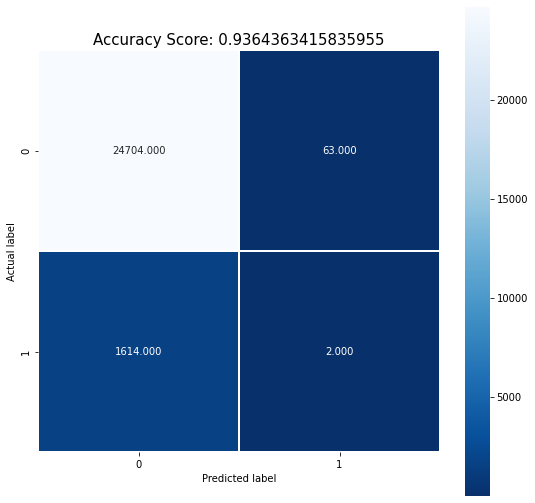

In [ ]:
score = accuracy_score(y_test, RF_pred)
cm = confusion_matrix(y_test, RF_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
# xgboost
modelXG = XGBClassifier()
modelXG.fit(var, y_train)
XG_pred = modelXG.predict(var_t)
print(accuracy_score(y_test, XG_pred))
print(classification_report(y_test, XG_pred))

0.9387484364931964
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     24767
           1       0.00      0.00      0.00      1616

    accuracy                           0.94     26383
   macro avg       0.47      0.50      0.48     26383
weighted avg       0.88      0.94      0.91     26383



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


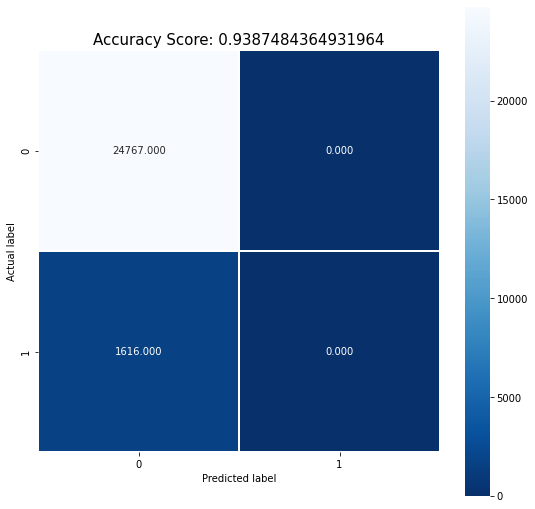

In [ ]:
score = accuracy_score(y_test, XG_pred)
cm = confusion_matrix(y_test, XG_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
# decision tree
modelDT = DecisionTreeClassifier()
modelDT.fit(var, y_train)
DT_pred = modelDT.predict(var_t)
print(accuracy_score(y_test, DT_pred))
print(classification_report(y_test, DT_pred))

0.8731380055338666
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     24767
           1       0.06      0.07      0.06      1616

    accuracy                           0.87     26383
   macro avg       0.50      0.50      0.50     26383
weighted avg       0.88      0.87      0.88     26383



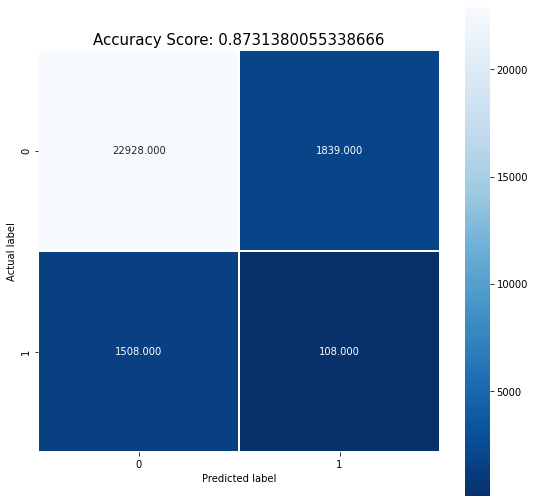

In [ ]:
score = accuracy_score(y_test, DT_pred)
cm = confusion_matrix(y_test, DT_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
source1 = pd.read_csv('/content/drive/MyDrive/BU Capstone Team2 Credit No_hit/Data/team2_source1.csv.gz')
imp = pd.read_csv('/content/drive/MyDrive/BU Capstone Team2 Credit No_hit/Results 4.16/source 1 importance check.csv')

In [ ]:
source1.head()

,pol_id,year,var0009,var0010,var0011,var0012,var0013,var0014,var0015,var0016,var0017,var0018,var0019,var0020,var0021,var0022,var0023,var0024,var0025,var0026,var0027,var0028,var0029,var0030,var0031,var0032,var0033,var0034,var0035,var0036,var0037,var0038,var0039,var0040,var0041,var0042,var0043,var0044,var0045,var0046,...,var0674,var0675,var0676,var0677,var0678,var0679,var0680,var0681,var0682,var0683,var0684,var0685,var0686,var0687,var0688,var0689,var0690,var0691,var0692,var0693,var0694,var0695,var0696,var0697,var0698,var0699,var0700,var0701,var0702,var0703,var0704,var0705,var0706,var0707,var0708,var0709,var0710,var0711,var0712,var0713
0,MWH00001004972,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MWH00001004972,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.127007,0.000888,0.011569,126.0,0.788927,0.002175,0.059613,187.0,94.0,0.008667,1.057633,0.211073,0.000810,0.001543,0.014667,0.001983,354.0,56110.0,0.000181,0.119839,0.011818,0.019170,0.002091,0.987209,764.0,0.002323,1.597237,0.003046,1.254364,1.064349,0.793177,0.065798,0.000951,0.002764,0.001491,0.001785,0.000720,0.958193,0.229960,0.119163
2,MWH00001004972,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.127007,0.000888,0.011569,126.0,0.788927,0.002175,0.059613,187.0,94.0,0.008667,1.057633,0.211073,0.000810,0.001543,0.014667,0.001983,354.0,56110.0,0.000181,0.119839,0.011818,0.019170,0.002091,0.987209,764.0,0.002323,1.597237,0.003046,1.254364,1.064349,0.793177,0.065798,0.000951,0.002764,0.001491,0.001785,0.000720,0.958193,0.229960,0.119163
3,MWH00001004972,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.142655,0.001157,0.012412,126.0,0.771331,0.002049,0.056616,186.0,101.0,0.007833,1.057706,0.228669,0.000808,0.001425,0.015202,0.001738,362.0,53649.2,0.000169,0.135973,0.011281,0.017271,0.001931,0.987005,762.0,0.002391,1.656903,0.003160,1.267175,1.031740,0.797269,0.061620,0.000922,0.002368,0.001357,0.001603,0.000969,0.957548,0.227162,0.117442
4,BHH00001005147,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    388 non-null    int64  
 1   Unnamed: 0.1  388 non-null    object 
 2   count         388 non-null    int64  
 3   mean          388 non-null    float64
 4   std           388 non-null    float64
 5   min           388 non-null    float64
 6   1%            388 non-null    float64
 7   5%            388 non-null    float64
 8   10%           388 non-null    float64
 9   25%           388 non-null    float64
 10  50%           388 non-null    float64
 11  75%           388 non-null    float64
 12  90%           388 non-null    float64
 13  95%           388 non-null    float64
 14  99%           388 non-null    float64
 15  max           388 non-null    float64
 16  miss          388 non-null    int64  
 17  missrate      388 non-null    float64
 18  RF_imp        388 non-null    

In [ ]:
imp_var10p = list(imp['Unnamed: 0.1'][:39])
imp_var10p.append('pol_id')
imp_var10p.append('year')

In [ ]:
s1 = source1[imp_var10p]

In [ ]:
s1.head()

,var0603,var0410,var0063,var0120,var0188,var0437,var0194,var0559,var0591,var0624,var0160,var0028,var0412,var0140,var0605,var0436,var0110,var0438,var0580,var0704,var0014,var0157,var0088,var0036,var0065,var0693,var0010,var0113,var0077,var0129,var0115,var0098,var0124,var0154,var0101,var0132,var0409,var0009,var0164,pol_id,year
0,NaN,0.465438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.177489,NaN,NaN,61.734657,NaN,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083874,NaN,NaN,MWH00001004972,2016
1,0.001619,0.465438,NaN,NaN,NaN,NaN,NaN,0.799283,0.418665,1.065094,NaN,NaN,0.177489,NaN,0.059919,62.734657,NaN,0.93,0.982186,0.793177,NaN,NaN,NaN,NaN,NaN,0.119839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083874,NaN,NaN,MWH00001004972,2017
2,0.001619,0.465438,NaN,NaN,NaN,NaN,NaN,0.799283,0.418665,1.065094,NaN,NaN,0.177489,NaN,0.059919,63.734657,NaN,0.93,0.982186,0.793177,NaN,NaN,NaN,NaN,NaN,0.119839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083874,NaN,NaN,MWH00001004972,2018
3,0.001617,0.465438,NaN,NaN,NaN,0.0,NaN,0.787611,0.421935,1.065286,NaN,NaN,0.177489,NaN,0.059014,64.734657,NaN,0.93,0.983023,0.797269,NaN,NaN,NaN,NaN,NaN,0.135973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083874,NaN,NaN,MWH00001004972,2019
4,NaN,1.333591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493920,NaN,NaN,52.889431,NaN,1.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.370627,NaN,NaN,BHH00001005147,2016


In [ ]:
s1.shape

(400719, 41)

In [ ]:
s1.to_csv('s1_top10.csv')